In [5]:
import os
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

The original picture looks like:

![logo](https://testksj.oss-cn-beijing.aliyuncs.com/uPic/logo.png)

The OpenCV assumes images are in BGR channel order. OpenCV imread, imwrite and imshow all work with the BGR order, so the image won't change if we use cv2.imshow to show the image. But it doesn't work with matplotlib. 

Most image processing library use the RGB ordering such as matplotlib so if use `plt.imshow`, the color of the logo changed.

In [6]:
img = cv2.imread("logo.png")

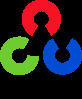

In [7]:
# show the image by cv2
# The cv2.imshow() and cv.imshow() functions from the opencv-python package are incompatible with Jupyter notebook; 
# see https://github.com/jupyter/notebook/issues/3935. 
# As a replacement, you can use the following function:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

Text(0.5, 1.0, 'Original')

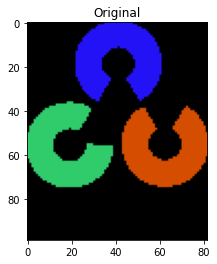

In [8]:
# show the image by matplotlib
plt.subplot(111)
plt.imshow(img)
plt.title("Original")

If we want to read image in RGB order in OpenCV,
we can use:

`img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

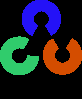

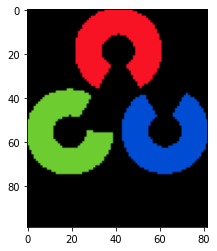

In [9]:
# read images in RGB order in OpenCV
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
from google.colab.patches import cv2_imshow
cv2_imshow(img_rgb)
plt.imshow(img_rgb)

**cv2.imread(FILENAME, FLAG)**

There are some flags:

**cv2.IMREAD_UNCHANGED:** read the image as is from the source(with alpha channel). If the source image is an RGB, it loads the image into array with Red, Green and Blue channels.

**cv2.IMREAD_COLOR:** convert image to the 3 channel BGR color image but no transparency channel

**cv2.IMREAD_GRAYSCALE:** convert image to the single channel grayscale image

Check more flags here: 
[OpenCV: Flags used for image file reading and writing](https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80)


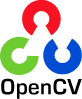

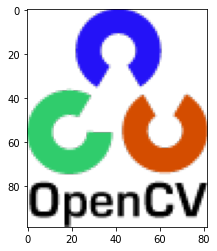

In [10]:
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
plt.imshow(img)

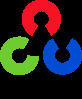

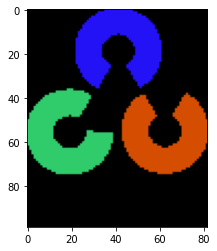

In [11]:
img = cv2.imread('logo.png', cv2.IMREAD_COLOR)
cv2_imshow(img)
plt.imshow(img)

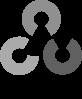

In [12]:
img = cv2.imread('logo.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

Let's have a look at the BGR channel. If we want to print the whole array then set `np.set_printoptions(threshold=np.inf)` and set it back to default after print the array.
`np.set_printoptions(threshold=1000`

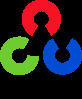

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
img = cv2.imread('logo.png', cv2.IMREAD_COLOR)
cv2_imshow(img)
b = img[:,:,0] # get blue channel
g = img[:,:,1] # get green channel
r = img[:,:,2] # get red channel

print(b)


In [14]:
np.set_printoptions(threshold=np.inf)
print(b)
np.set_printoptions(threshold=1000)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  36
   36  36  36  36  36  36  36  36  36  36  36  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0  36  36  36  36
   36  36  36  36  36  36  36  36  36  36  36  36  36  36   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0  36  36  36  36  36
   36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 

Now let's convert it to **RGB** channel. Even though we read image in RGB order but the logo color will change if we use `cv2.imshow` to show the image because it works with **BGR** order. `plt.imshow` show the original color of the image because it works with **RGB** order as well.

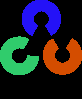

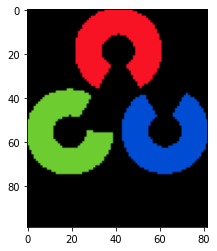

In [15]:
# read images in RGB order in OpenCV
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
from google.colab.patches import cv2_imshow
cv2_imshow(img_rgb)
plt.imshow(img_rgb)


In [16]:
r1 = img_rgb[:,:,0] # get blue channel
g1 = img_rgb[:,:,1] # get green channel
b1 = img_rgb[:,:,2] # get red channel

In [17]:
(img[:,:,0] == img_rgb[:,:,2]).all()

True

When you try to draw a rectangle box in OpenCV, be careful that the color of rectangle is also in **BGR** order.

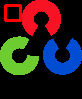

In [18]:
# read the image
image = cv2.imread('logo.png')
    

# represents the top left corner of rectangle
start_point = (5, 5)
  
# represents the bottom right corner of rectangle
end_point = (20, 20)
  
# choose the rectangle color in BGR
color = (0, 0, 255) # red
  
# thickness of lines that make up the rectangle is 2 px
thickness = 2
  
# draw a rectangle with red line borders of thickness of 2 px
image = cv2.rectangle(image, start_point, end_point, color, thickness)
  
# Displaying the image 
cv2_imshow(image) 